In [80]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline 
import matplotlib.pyplot as plt



In [17]:
# Evaluacion de tier de artefactos
# Se buscar obtener una simplificacion de decision frente al tier de un artefacto

# Por ejemplo como de "bueno" seria un artefacto con ataque plano "malo", pero substats "buenos"

# Basicamente se trata de clasificarlos antes de realizar la prueba en un entorno real

crt_damage = ctrl.Antecedent(np.arange(0, 30, 1), 'crt_damage')
crt_rate = ctrl.Antecedent(np.arange(0, 15, 1), 'crt_rate')
atq = ctrl.Antecedent(np.arange(0, 120, 1), 'atq')
atq_porcen = ctrl.Antecedent(np.arange(0, 40, 1), 'atq_porcen')
tier = ctrl.Consequent(np.arange(0, 100, 1), 'tier', defuzzify_method="mom")


# Antecedent

crt_damage['bad'] = fuzz.trimf(crt_damage.universe, [0, 0, 6])
crt_damage['average'] = fuzz.trimf(crt_damage.universe, [0, 6, 15])
crt_damage['good'] = fuzz.trimf(crt_damage.universe, [6, 30, 30])

crt_rate['bad'] = fuzz.trimf(crt_rate.universe, [0, 0, 3])
crt_rate['average'] = fuzz.trimf(crt_rate.universe, [0, 3, 7])
crt_rate['good'] = fuzz.trimf(crt_rate.universe, [3, 15, 15])

atq['bad'] = fuzz.trimf(atq.universe, [0, 0, 50])
atq['average'] = fuzz.trimf(atq.universe, [0, 50, 90])
atq['good'] = fuzz.trimf(atq.universe, [50, 120, 120])

atq_porcen['bad'] = fuzz.trimf(atq_porcen.universe, [0, 0, 15])
atq_porcen['average'] = fuzz.trimf(atq_porcen.universe, [0, 15, 30])
atq_porcen['good'] = fuzz.trimf(atq_porcen.universe, [15, 40, 40])



# Consequent
tier['B'] = fuzz.trimf(tier.universe, [0, 0, 30])
tier['A'] = fuzz.trimf(tier.universe, [0, 30, 60])
tier['GOD'] = fuzz.trapmf(tier.universe, [30, 60, 100, 100])

D:\anaconda\envs\CUDA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\anaconda\envs\CUDA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\anaconda\envs\CUDA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\anaconda\envs\CUDA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\anaconda\envs\CUDA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: Us

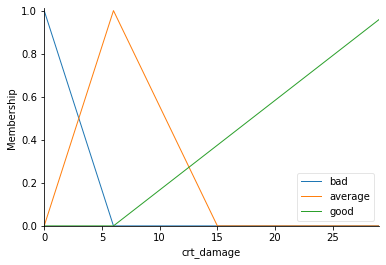

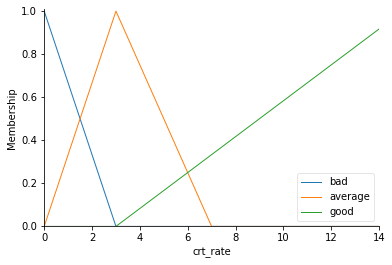

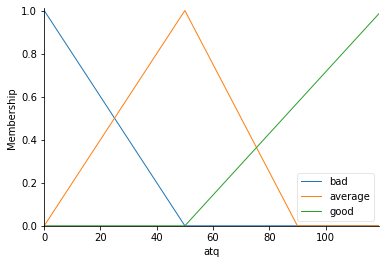

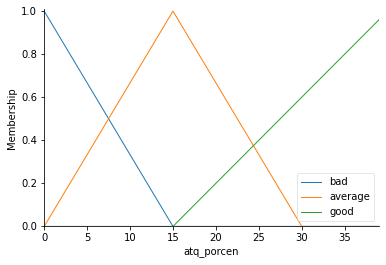

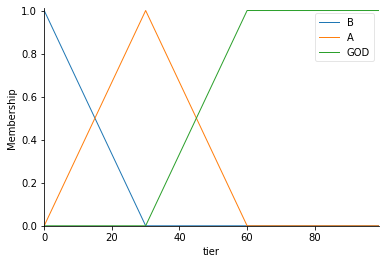

In [18]:
crt_damage.view()
crt_rate.view()
atq.view()
atq_porcen.view()
tier.view()

In [44]:
#Rules


# bad average good

# crt_damage
# crt_rate
# atq
# atq_porcen



# A B GOD
# tier


rule1 = ctrl.Rule(crt_damage['good'] & (crt_rate['bad'] | atq_porcen['bad']), tier['B'])
rule2 = ctrl.Rule(crt_damage['bad'] & (crt_rate['good']), tier['B'])

rule3 = ctrl.Rule(crt_damage['average'] & (atq_porcen['average']), tier['A'])
rule4 = ctrl.Rule(atq['average'] & (atq_porcen['good']) | (crt_rate['good']), tier['A'])

rule5 = ctrl.Rule(crt_damage['average'] & (atq_porcen['good']) & (crt_rate['good']), tier['GOD'])
rule6 = ctrl.Rule(crt_damage['good'] & (atq_porcen['average']) & (crt_rate['good']), tier['GOD'])


rule7 = ctrl.Rule((atq_porcen['good'] | crt_rate['good'] | crt_damage['good']) & (atq['bad']), tier['B'])

rule8 = ctrl.Rule(crt_rate['average'] & (crt_damage['average']), tier['A'])

rule9 = ctrl.Rule(atq['good'] & (crt_damage['good']) & (crt_rate['good']), tier['GOD'])


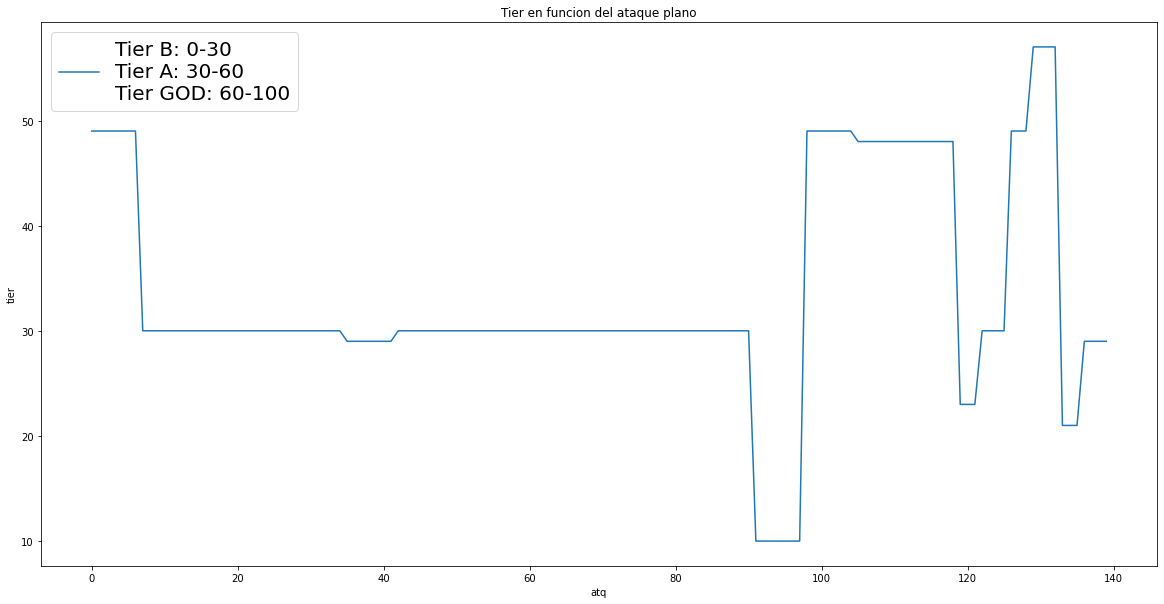

D:\anaconda\envs\CUDA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


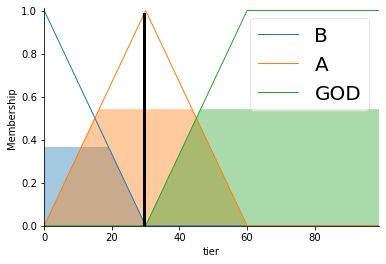

In [91]:
tier_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tier_system = ctrl.ControlSystemSimulation(tier_ctrl)


b = [] 

for d in range(0, 20):
    for c in range(0, 70, 10):
        tier_system.input['crt_damage'] = d
        tier_system.input['crt_rate'] = d/2
        tier_system.input['atq'] = c
        tier_system.input['atq_porcen'] = d/2
        tier_system.compute()
        b.append(int(tier_system.output['tier']))
        
plt.figure(figsize=(20, 10)) 
plt.title("Tier en funcion del ataque plano")
plt.ylabel("tier")
plt.xlabel("atq")
plt.plot(b)
plt.legend(["Tier B: 0-30\nTier A: 30-60\nTier GOD: 60-100"])
plt.show()

# a medida que el daño critico, probalidad critica y ataque porcentual son mas altos,
# el ataque plano se vuelve la variable con mayor peso, ya que sin ataque plano, los modificares no surten efecto 
# ver regla 7

tier.view(sim=tier_system)

D:\anaconda\envs\CUDA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


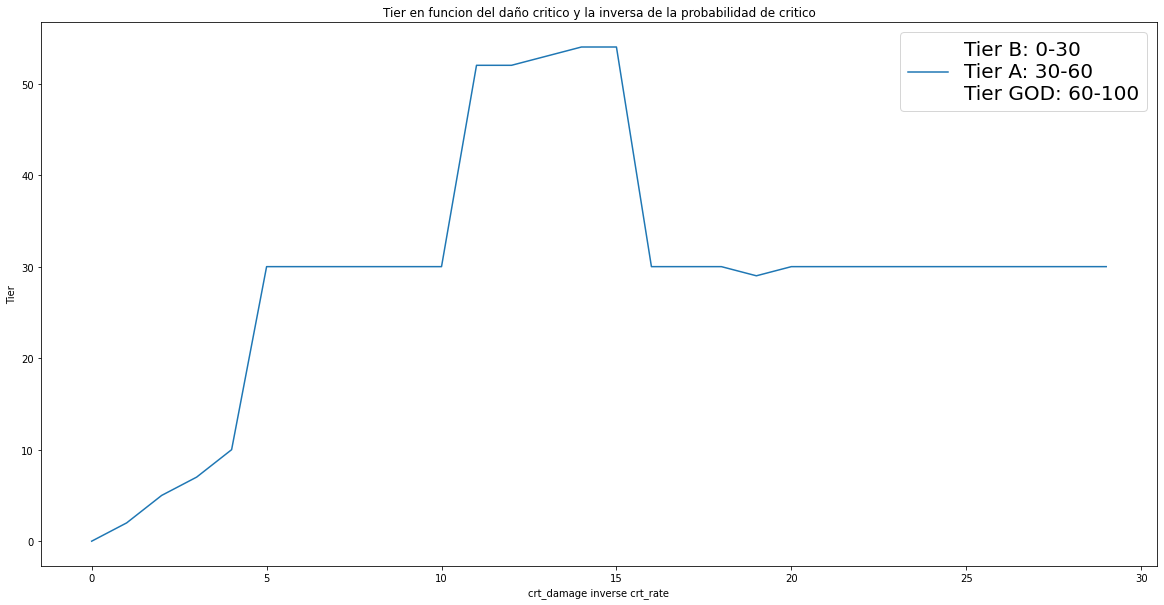

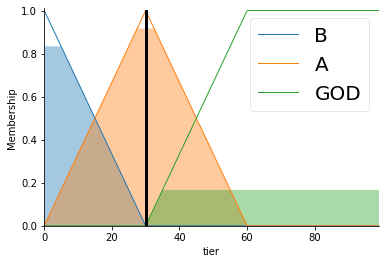

In [88]:
b = []

tier_system.input['atq'] = 80

for d in range(0, 30):
    tier_system.input['atq_porcen'] = 20
    tier_system.input['crt_damage'] = 30 - d
    tier_system.input['crt_rate']   = d / 2
    tier_system.compute()
    b.append(int(tier_system.output['tier']))
    
plt.figure(figsize=(20, 10)) 
plt.title("Tier en funcion del daño critico y la inversa de la probabilidad de critico")
plt.ylabel("Tier")
plt.xlabel("crt_damage inverse crt_rate")
plt.plot(b)
plt.legend(["Tier B: 0-30\nTier A: 30-60\nTier GOD: 60-100"])

# como se puede observar al principio con mucho daño critico pero sin porbabilidad el tier es el mas bajo
# a medida que la probabilidad el pienza a aumentar tambien lo hace el tier, el maximo se produce cuando ambas
# probabilidad y daño critico estan balanceadas


tier.view(sim=tier_system)
